# CRF

Conditional Random Field

# Vocabulary

In [1]:
Y = ['N', 'V', 'DT']
Y = ['S'] + Y # add in the start token

Y

['S', 'N', 'V', 'DT']

# Tokens

In [2]:
X = ['the', 'dog', 'barks', 'cat', 'meows']

X

['the', 'dog', 'barks', 'cat', 'meows']

# Vectorizers

In [3]:
vy = dict(zip(Y, range(len(Y))))
vx = dict(zip(X, range(len(X))))
vy_ = dict(zip(range(len(Y)), Y))
vx_ = dict(zip(range(len(X)), X))

vy, vx, vy_, vx_

({'S': 0, 'N': 1, 'V': 2, 'DT': 3},
 {'the': 0, 'dog': 1, 'barks': 2, 'cat': 3, 'meows': 4},
 {0: 'S', 1: 'N', 2: 'V', 3: 'DT'},
 {0: 'the', 1: 'dog', 2: 'barks', 3: 'cat', 4: 'meows'})

# Parameters

Potentials of $y_{i-1}, y_i, \text{ and } x_i$ to go together

$\Huge \Lambda(y_{i-1}, y_i, x_i)$

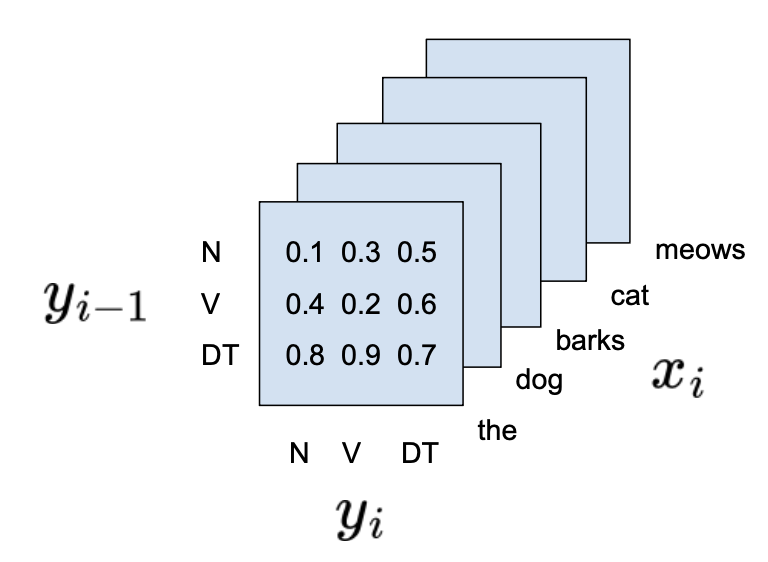

In [4]:
import numpy as np

Λ = np.random.rand(len(X), len(Y), len(Y))
Λ

array([[[0.8493395 , 0.25203213, 0.06026137, 0.04143753],
        [0.39095655, 0.76496934, 0.5331149 , 0.3123825 ],
        [0.95712828, 0.09742234, 0.71325569, 0.63728728],
        [0.24132191, 0.75656035, 0.52653907, 0.68355057]],

       [[0.92926978, 0.30454776, 0.80449349, 0.01984271],
        [0.06781348, 0.46821999, 0.34045297, 0.38435691],
        [0.29574024, 0.65435083, 0.70611799, 0.38520275],
        [0.89852421, 0.72599314, 0.23559349, 0.37314716]],

       [[0.45588762, 0.37048537, 0.30331722, 0.72090489],
        [0.75029243, 0.15935053, 0.96669844, 0.61922484],
        [0.80997433, 0.55432951, 0.420523  , 0.5870958 ],
        [0.55691307, 0.37619664, 0.25564076, 0.75424971]],

       [[0.42696747, 0.37898757, 0.11519647, 0.76024039],
        [0.55841491, 0.45899451, 0.23633373, 0.52971068],
        [0.9408606 , 0.49884206, 0.26176599, 0.37231381],
        [0.50039544, 0.09323164, 0.56309459, 0.86212855]],

       [[0.67853191, 0.47327408, 0.72622413, 0.58391277],
      

# Sample Input

In [5]:
y = ['DT', 'N', 'V']

x = ['the', 'dog', 'barks']

print(y)
print(x)

['DT', 'N', 'V']
['the', 'dog', 'barks']


# Unnormalized predict

Compute $\text{score}(\mathbf{y}, \mathbf{x})$ as the product of potential factors

In [6]:
def predict_score(y, x):
    y_ = ['S'] + y
    x_ = [None] + x
    n = len(x_)
    score = 0
    for i in range(1, n):
        λ = Λ[vy[y_[i-1]], vy[y_[i]], vx[x_[i]]]
        score += np.exp(λ)
    return score

predict_score(y, x)

4.881523342659426

# Normalized predict

Compute $p(\mathbf{y} | \mathbf{x}) = \frac{\displaystyle \text{score}(\mathbf{y}, \mathbf{x})}{\displaystyle \sum_{\mathbf{y}'} \text{score}(\mathbf{y}, \mathbf{x})}$. Use Viterbi DP algorithm to calculate denominator.

# Initialize DP Table

In [7]:
import pandas as pd

dp = np.zeros([len(y), len(x)])

df = pd.DataFrame(dp, index=Y[1:], columns=x)
df

,the,dog,barks
N,0.0,0.0,0.0
V,0.0,0.0,0.0
DT,0.0,0.0,0.0


# Initialize first column

By hand ✍️

In [8]:
dp[0, 0] = Λ[vy['S'], vy['N'], vx['the']]
dp[1, 0] = Λ[vy['S'], vy['V'], vx['the']]
dp[2, 0] = Λ[vy['S'], vy['DT'], vx['the']]

df = pd.DataFrame(dp, index=Y[1:], columns=x)
df

,the,dog,barks
N,0.390957,0.0,0.0
V,0.957128,0.0,0.0
DT,0.241322,0.0,0.0


# Fill in the rest of the table

By hand ✍️

In [9]:
dp[0, 1] = dp[0, 0]*Λ[vy['DT'], vy['DT'], vx['dog']] + \
           dp[1, 0]*Λ[vy['N'], vy['DT'], vx['dog']] + \
           dp[2, 0]*Λ[vy['V'], vy['DT'], vx['dog']]

dp[1, 1] = dp[0, 0]*Λ[vy['DT'], vy['N'], vx['dog']] + \
           dp[1, 0]*Λ[vy['N'], vy['N'], vx['dog']] + \
           dp[2, 0]*Λ[vy['V'], vy['N'], vx['dog']]

dp[2, 1] = dp[0, 0]*Λ[vy['DT'], vy['N'], vx['dog']] + \
           dp[1, 0]*Λ[vy['N'], vy['N'], vx['dog']] + \
           dp[2, 0]*Λ[vy['V'], vy['N'], vx['dog']]

df = pd.DataFrame(dp, index=Y[1:], columns=x)
df

,the,dog,barks
N,0.390957,0.822103,0.0
V,0.957128,0.666048,0.0
DT,0.241322,0.666048,0.0


In [10]:
dp[0, 2] = dp[0, 1]*Λ[vy['DT'], vy['DT'], vx['dog']] + \
           dp[1, 1]*Λ[vy['N'], vy['DT'], vx['dog']] + \
           dp[2, 1]*Λ[vy['V'], vy['DT'], vx['dog']]

dp[1, 2] = dp[0, 1]*Λ[vy['DT'], vy['N'], vx['dog']] + \
           dp[1, 1]*Λ[vy['N'], vy['N'], vx['dog']] + \
           dp[2, 1]*Λ[vy['V'], vy['N'], vx['dog']]

dp[2, 2] = dp[0, 1]*Λ[vy['DT'], vy['N'], vx['dog']] + \
           dp[1, 1]*Λ[vy['N'], vy['N'], vx['dog']] + \
           dp[2, 1]*Λ[vy['V'], vy['N'], vx['dog']]

df = pd.DataFrame(dp, index=Y[1:], columns=x)
df

,the,dog,barks
N,0.390957,0.822103,0.810758
V,0.957128,0.666048,0.795333
DT,0.241322,0.666048,0.795333


In [11]:
def predict_probability(y, x):
    numerator = predict_score(y, x)
    denominator = dp[:, -1].sum()
    return numerator / denominator

predict_probability(y, x)

2.0327625978840143

# Vectorized DP

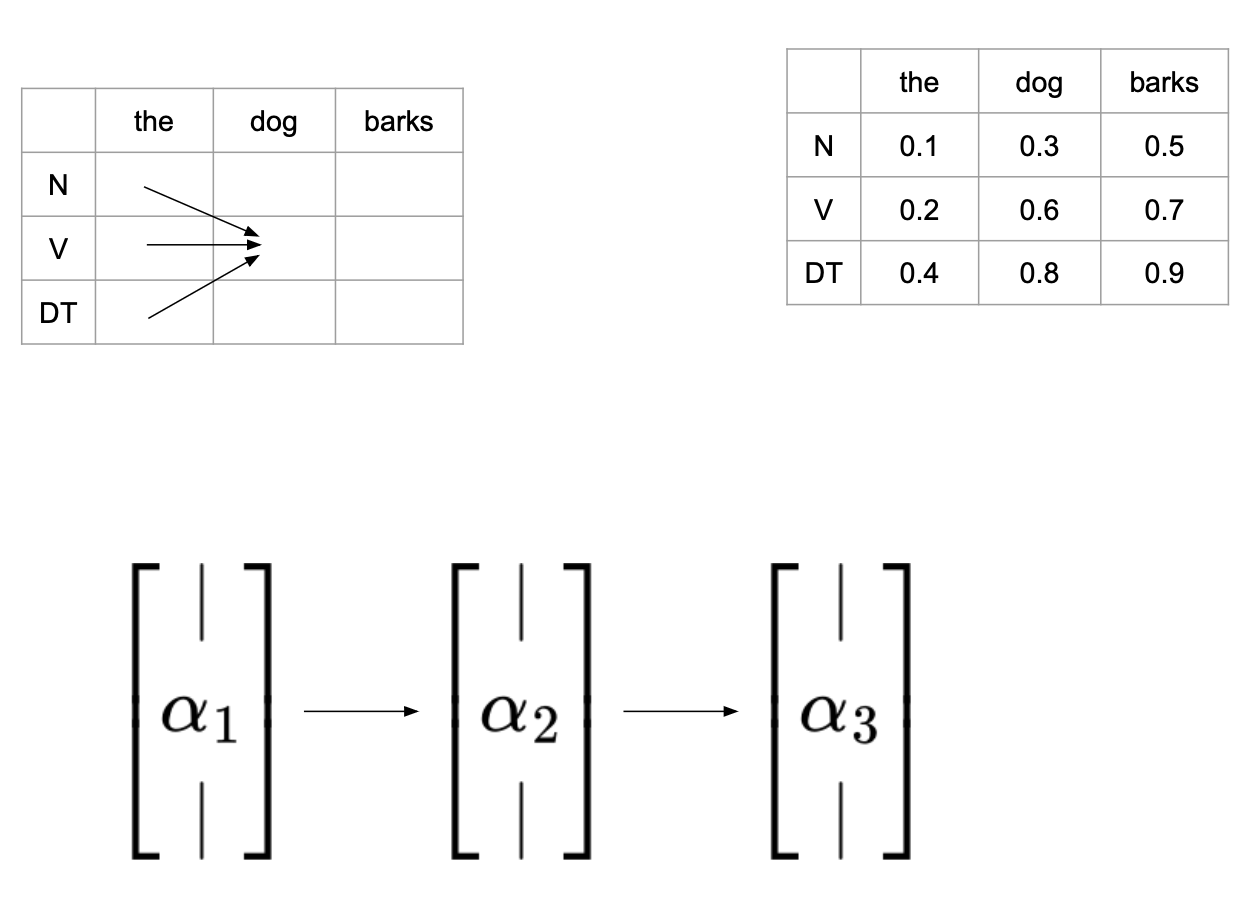

# Initialize DP Table

In [20]:
A = np.zeros([len(Y[1:]), len(x)])

pd.DataFrame(A, index=Y[1:], columns=x)

,the,dog,barks
N,0.0,0.0,0.0
V,0.0,0.0,0.0
DT,0.0,0.0,0.0


# Initialize the First Column from $\Lambda$

In [21]:
df = pd.DataFrame(Λ[vx['the']], index=Y, columns=Y)
df.index.name = '$\Lambda_{the}$'
df.style.apply(lambda s: ['']+['background-color: #ffcccc']*3 if s.name=='S' else ['']*4, axis=1)

,S,N,V,DT
$\Lambda_{the}$,,,,
S,0.849340,0.252032,0.060261,0.041438
N,0.390957,0.764969,0.533115,0.312383
V,0.957128,0.097422,0.713256,0.637287
DT,0.241322,0.756560,0.526539,0.683551


In [22]:
A[:, 0] = Λ[vx['the'], vy['S'], 1:]

df = pd.DataFrame(A, index=Y[1:], columns=x)
df.index.name = 'DP'
df.style.apply(lambda s: ['background-color: #ffcccc']*3 if s.name == 'the' else ['']*3, axis=0)

,the,dog,barks
DP,,,
N,0.252032,0.000000,0.000000
V,0.060261,0.000000,0.000000
DT,0.041438,0.000000,0.000000


# Fill in the Second Column

If it was this:

```python
dp[0, 1] = dp[0, 0]*Λ[vx['dog'], vy['N'], vy['N']] + dp[1, 0]*Λ[vx['dog'], vy['N'], vy['V']] + dp[2, 0]*Λ[vx['dog'], vy['N'], vy['DT']]
dp[1, 1] = dp[0, 0]*Λ[vx['dog'], vy['V'], vy['N']] + dp[1, 0]*Λ[vx['dog'], vy['V'], vy['V']] + dp[2, 0]*Λ[vx['dog'], vy['V'], vy['DT']]
dp[2, 1] = dp[0, 0]*Λ[vx['dog'], vy['DT'], vy['N']] + dp[1, 0]*Λ[vx['dog'], vy['DT'], vy['V']] + dp[2, 0]*Λ[vx['dog'], vy['DT'], vy['DT']]
```

Then it would just be $\Lambda \alpha_1^\text{T}$

But since it's like this instead:

```python
dp[0, 1] = dp[0, 0]*Λ[vx['dog'], vy['N'], vy['N']] + \
           dp[1, 0]*Λ[vx['dog'], vy['V'], vy['N']] + \
           dp[2, 0]*Λ[vx['dog'], vy['DT'], vy['N']]

dp[1, 1] = dp[0, 0]*Λ[vx['dog'], vy['N'], vy['V']] + \
           dp[1, 0]*Λ[vx['dog'], vy['V'], vy['V']] + \
           dp[2, 0]*Λ[vx['dog'], vy['DT'], vy['V']]

dp[2, 1] = dp[0, 0]*Λ[vx['dog'], vy['N'], vy['DT']] + \
           dp[1, 0]*Λ[vx['dog'], vy['V'], vy['DT']] + \
           dp[2, 0]*Λ[vx['dog'], vy['DT'], vy['DT']]
```

We need to do $\Lambda^\text{T} \alpha_1^\text{T}$

In [23]:
A[:, 1:2] = Λ[vx['dog'], 1:, 1:].T @ A[:, 0].reshape(3, 1)

df = pd.DataFrame(A, index=Y[1:], columns=x)
df.index.name = 'DP'
df

,the,dog,barks
DP,,,
N,0.252032,0.187522,0.0
V,0.060261,0.138119,0.0
DT,0.041438,0.135545,0.0


# Fill in the Last Column

In [24]:
A[:, 2:3] = Λ[vx['barks'], 1:, 1:].T @ A[:, 1].reshape(3, 1)

df = pd.DataFrame(A, index=Y[1:], columns=x)
df.index.name = 'DP'
df

,the,dog,barks
DP,,,
N,0.252032,0.187522,0.157437
V,0.060261,0.138119,0.274010
DT,0.041438,0.135545,0.299443


# Sum Last Column

In [29]:
denominator = A[:, -1].sum()

denominator

0.7308898299152229